<a href="https://colab.research.google.com/github/PratulG/Comcast_telecom_complaints/blob/main/Comcast_telecom_complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [ ]:
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [ ]:
dataset.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [ ]:
dataset.shape

(2224, 11)

In [ ]:
date = dataset['Date_month_year']

In [ ]:
date

0       22-Apr-15
1       04-Aug-15
2       18-Apr-15
3       05-Jul-15
4       26-May-15
          ...    
2219    04-Feb-15
2220    06-Feb-15
2221    06-Sep-15
2222    23-Jun-15
2223    24-Jun-15
Name: Date_month_year, Length: 2224, dtype: object

In [ ]:
# Complaints
dataset_Com = dataset[['Date_month_year','Customer Complaint']]

In [ ]:
dataset_Com

,Date_month_year,Customer Complaint
0,22-Apr-15,Comcast Cable Internet Speeds
1,04-Aug-15,Payment disappear - service got disconnected
2,18-Apr-15,Speed and Service
3,05-Jul-15,Comcast Imposed a New Usage Cap of 300GB that ...
4,26-May-15,Comcast not working and no service to boot
...,...,...
2219,04-Feb-15,Service Availability
2220,06-Feb-15,Comcast Monthly Billing for Returned Modem
2221,06-Sep-15,complaint about comcast
2222,23-Jun-15,Extremely unsatisfied Comcast customer


In [ ]:
dataset["date_index"] = dataset["Date_month_year"] + " "+ dataset["Time"]
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM


In [ ]:
dataset["date_index"] = pd.to_datetime(dataset["date_index"])
dataset["Date_month_year"] = pd.to_datetime(dataset["Date_month_year"])

In [ ]:
dataset = dataset.set_index(dataset["date_index"])

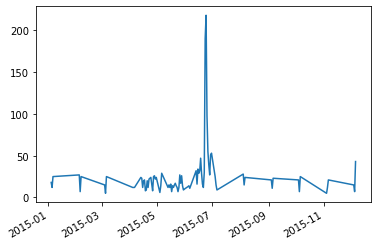

In [ ]:
dataset["Date_month_year"].value_counts().plot();

In [ ]:
f = dataset.groupby(pd.Grouper(freq="M")).size()
f.head()

date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

<AxesSubplot:xlabel='date_index'>

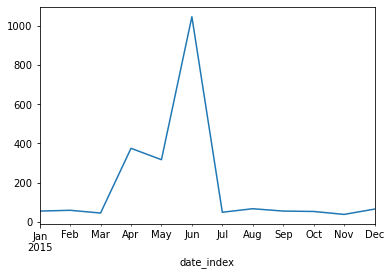

In [ ]:
f.plot()

In [ ]:
g = dataset.groupby(pd.Grouper(freq="D")).size()
g.head()

date_index
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-01-07     0
2015-01-08     0
Freq: D, dtype: int64

<AxesSubplot:xlabel='date_index'>

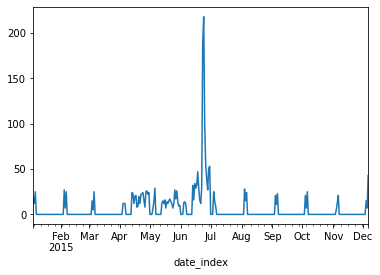

In [ ]:
g.plot()

In [ ]:
h = pd.DataFrame(dataset['Customer Complaint'].value_counts())
h.sort_values('Customer Complaint',ascending  = False).head(5)

,Customer Complaint
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Billing,11


In [ ]:
dataset.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [ ]:
dataset["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in dataset["Status"]]

In [ ]:
dataset

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04 09:13:18,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04 09:13:18,Closed
2015-02-06 13:24:39,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06 13:24:39,Closed
2015-09-06 17:28:41,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06 17:28:41,Closed


In [ ]:
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
# plot bars in stack manner
dataset.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [ ]:
dataset.groupby(["newStatus"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]

,newStatus,Count
0,Closed,1707
1,Open,517


In [ ]:
i = dataset.groupby(["State","newStatus"]).size().unstack().fillna(0)
i

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


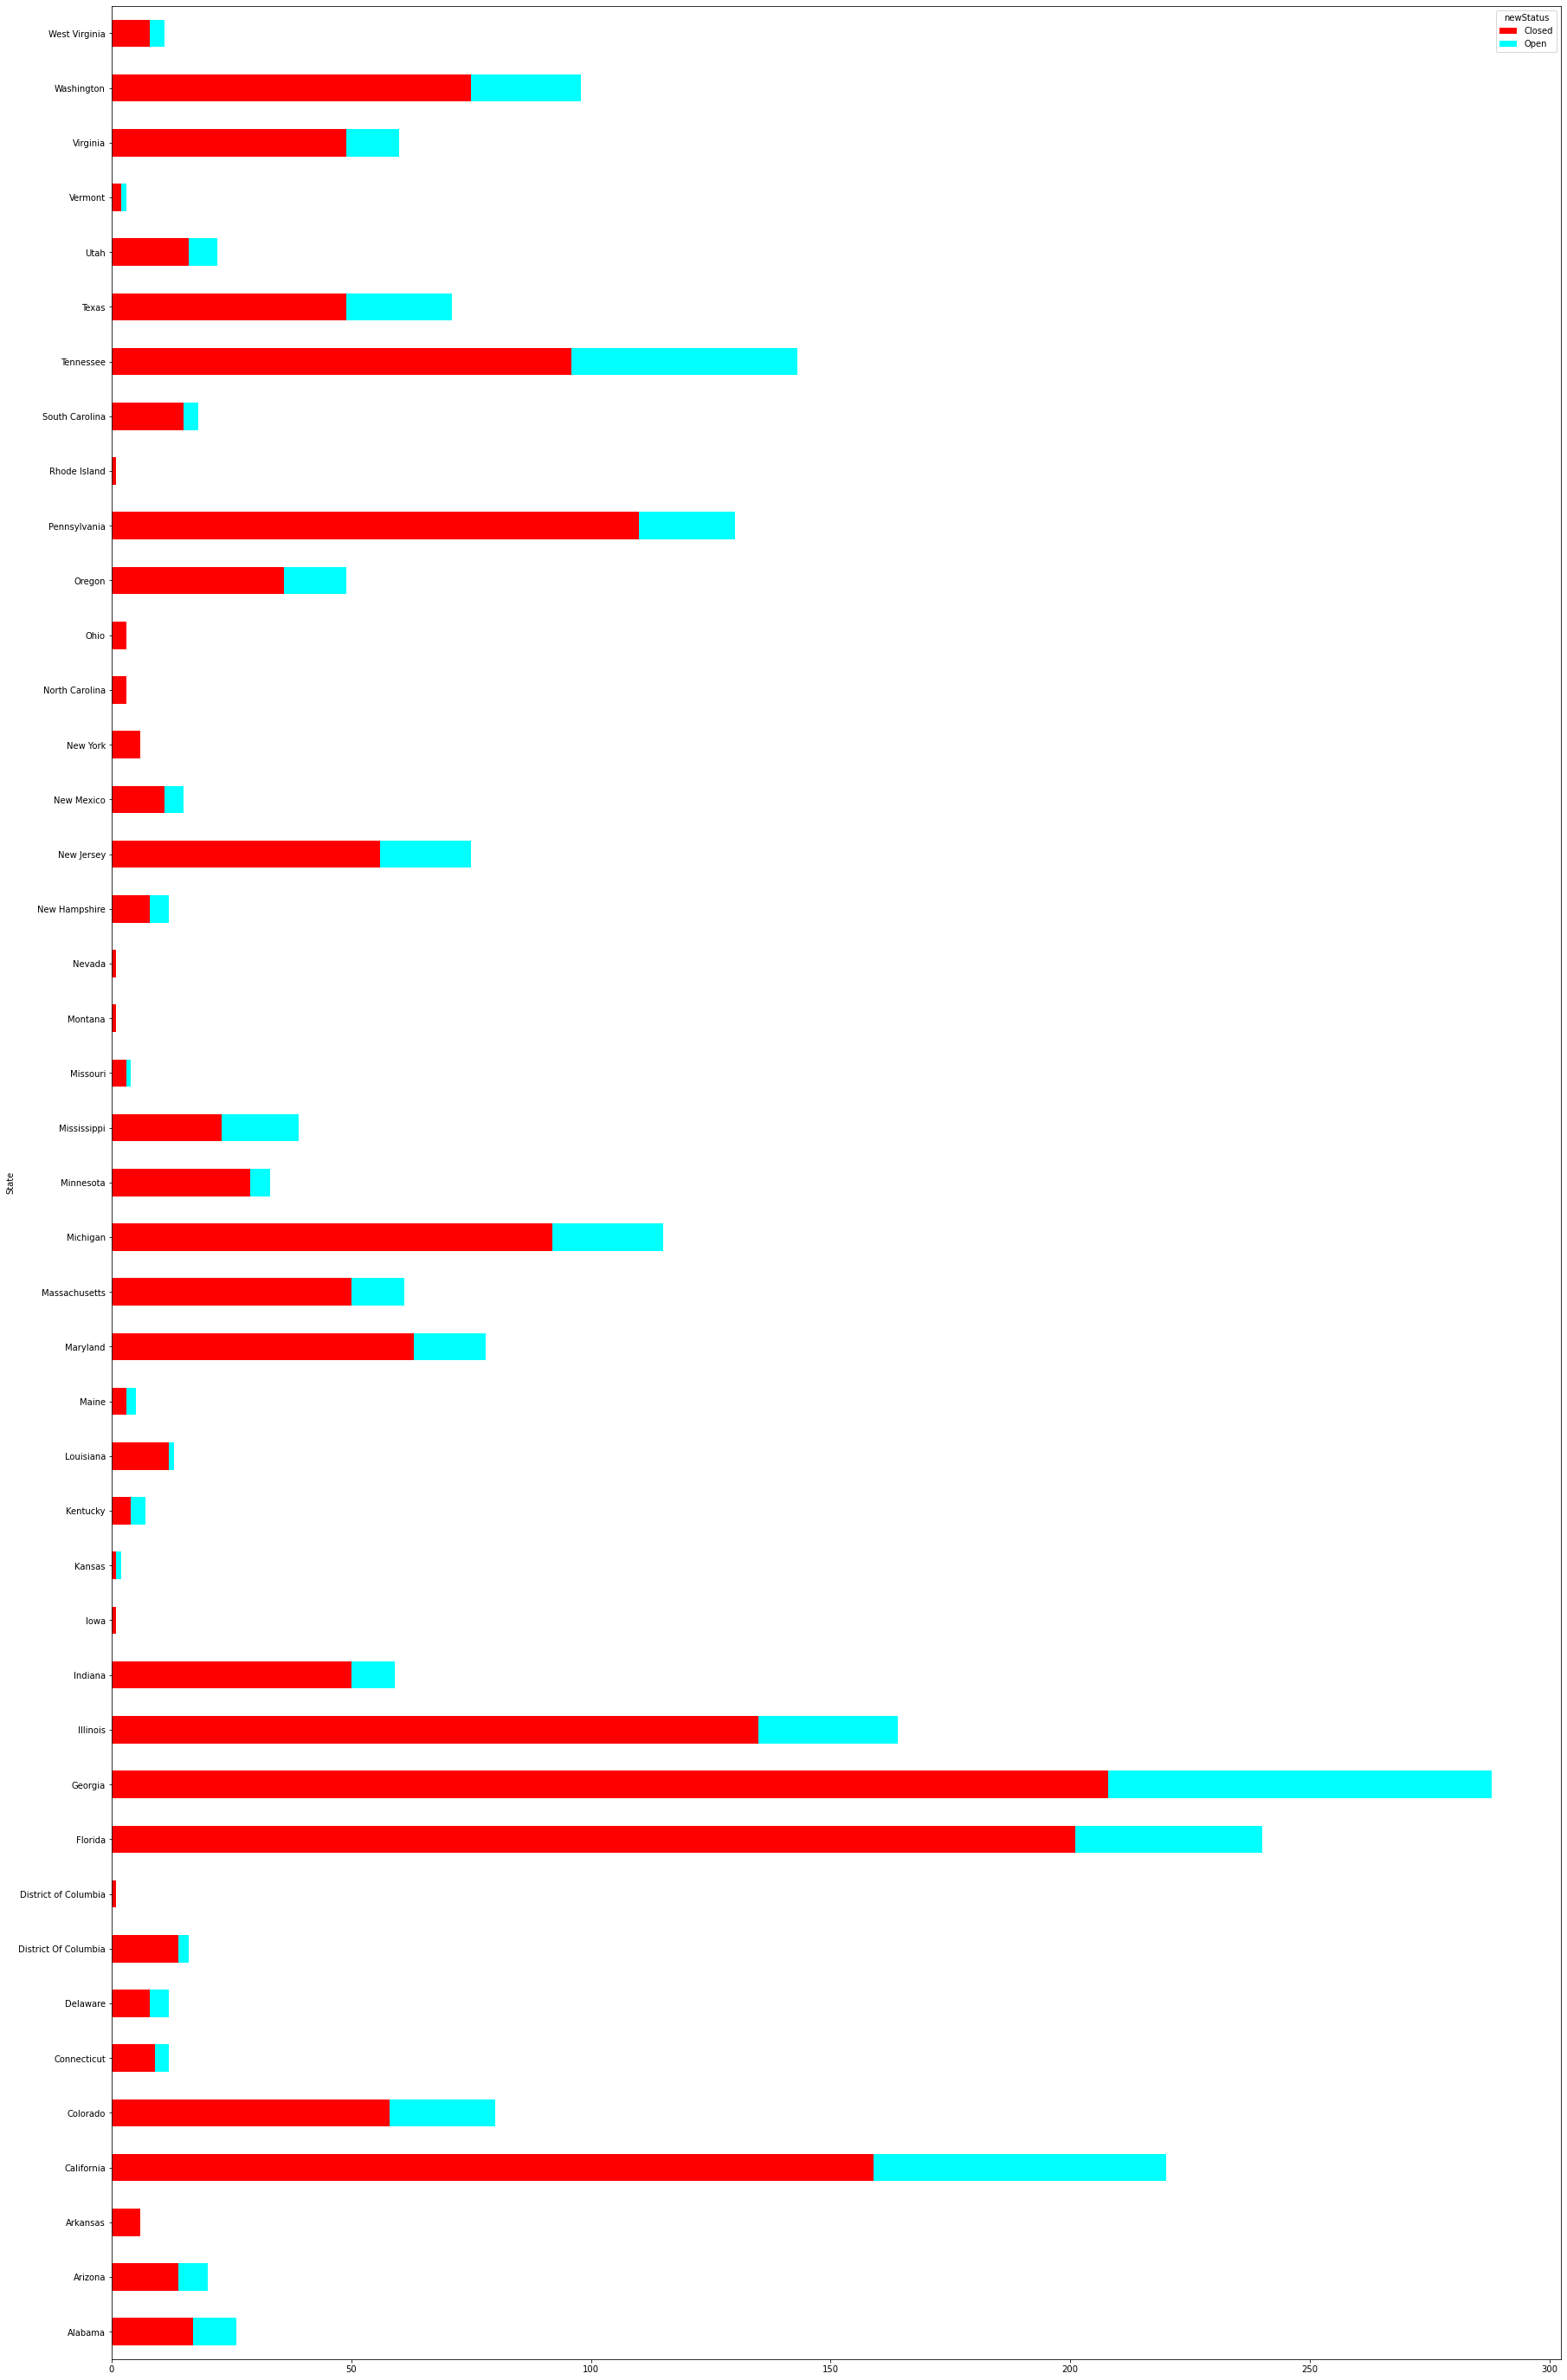

In [ ]:
i.plot(kind="barh", figsize=(30,50), stacked=True, label=['Closed','Open'], color=['red','cyan']);


In [ ]:
dataset.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [ ]:
k = dataset.groupby(["State","newStatus"]).size().unstack().fillna(0)
k['Unresolved Compliant %'] = (k['Open']/(k['Closed']+k['Open'])*100)
k = k['Unresolved Compliant %'].sort_values(ascending=False)
k.head(1).to_frame()

,Unresolved Compliant %
State,
Kansas,50.0


In [ ]:
dataset['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [ ]:
m = dataset.groupby(["Received Via","newStatus"]).size().unstack().fillna(0)
m['Resolved Till Date %'] = (m['Closed']/(m['Closed']+m['Open'])*100)
m['Resolved Till Date %'].round(decimals = 2).to_frame()

,Resolved Till Date %
Received Via,
Customer Care Call,77.21
Internet,76.29
